# Relationship between time difference and depth in 1D velocity model.

```{note}
This notebook can be downloaded as **{nb-download}`ps-depth.ipynb`**
```

Converting Ps time difference to depth is an useful method to estimate the depth of subsurface discontinuities corresponding to RF pulses. As the formula between Ps time difference $T_{Ps}$ and depth (equivalent to radius $R(i)$ in spherical coordinates) under a layered model, $V_P$ and $V_S$ influence the relationship. 

$$T_{Ps}(n) = \sum_{i=1}^n\left(\sqrt{\left(\frac{R(i)}{V_S(i)}\right)^2-p_{Ps}^2}-\sqrt{\left(\frac{R(i)}{V_P(i)}\right)^2-p^2}\right)\frac{{\Delta}r}{R(i)}$$

In relevant studies, different velocity models are used to estimate the effects of velocity anormalies on depth of discontinuities.

## Define a velocity model
The velocity model should be prepared in a txt file with 3 columns (i.e., depth or thickness, Vp and Vs). Both depth or thickness are accepted for Seispy. 
- Using thickness of layers are popular in other toolbox, such as the [CPS](https://www.eas.slu.edu/eqc/eqccps.html), [Raysum](https://home.cc.umanitoba.ca/~frederik/Software/) and [Hk](https://www.eas.slu.edu/People/LZhu/home.html).
- The depth is defined in reference models and in the [Taup toolkit](https://www.seis.sc.edu/taup/).

In [1]:
from seispy.core.depmodel import DepModel
import matplotlib.pyplot as plt
import numpy as np

### Customize a layered model
- `h` is the thickness of layers. The last layer can be set to 0 as the half space.
- `vp` and `vs` are velocities of corresponding layers.

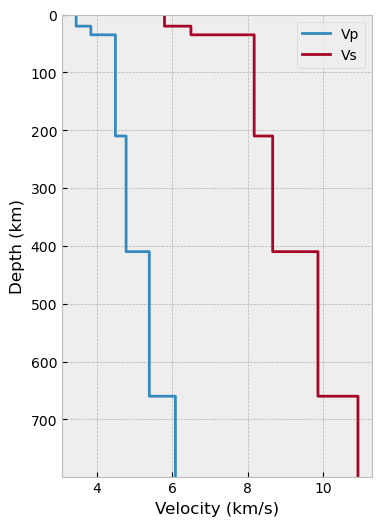

In [2]:
h = np.array([20, 15, 175, 200, 250, 0])
vp = np.array([5800, 6500, 8175, 8665, 9864, 10923])/1000
vs = np.array([3460, 3850, 4500, 4783, 5398, 6089])/1000
dep_range = np.arange(800)
depmod_layer = DepModel.read_layer_model(dep_range, h, vp, vs)
depmod_layer.plot_model(show=False)

### Use built-in reference model
Seispy has imported some reference models. `ak135` and `iasp91` are available for argument `velmod`.

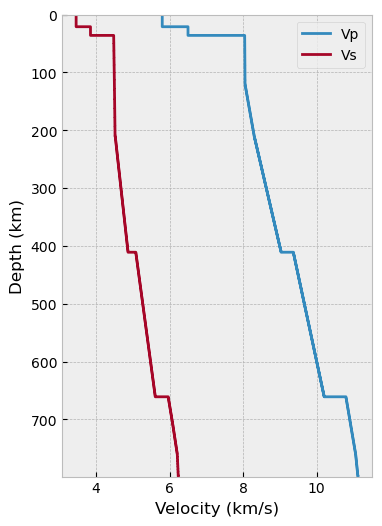

In [3]:
depmod_ak135 = DepModel(dep_range, velmod='ak135')
depmod_ak135.plot_model(show=False)

## Calculate time difference
The `DepModel` involve method for time difference calculation of conversion and multiple phases. Here, assuming the ray-parameter as 0.06 s/km, we calculate time differences with `dep_range` set before.

```{note}
The ray-parameters of P and Ps can be different. In following case, the ray-parameter of Ps is approximated as that of direct P wave.
```

(<matplotlib.patches.Rectangle at 0x7ff0b9fcfa40>,
 (<matplotlib.patches.ConnectionPatch at 0x7ff0c2752060>,
  <matplotlib.patches.ConnectionPatch at 0x7ff0b9e3a1b0>))

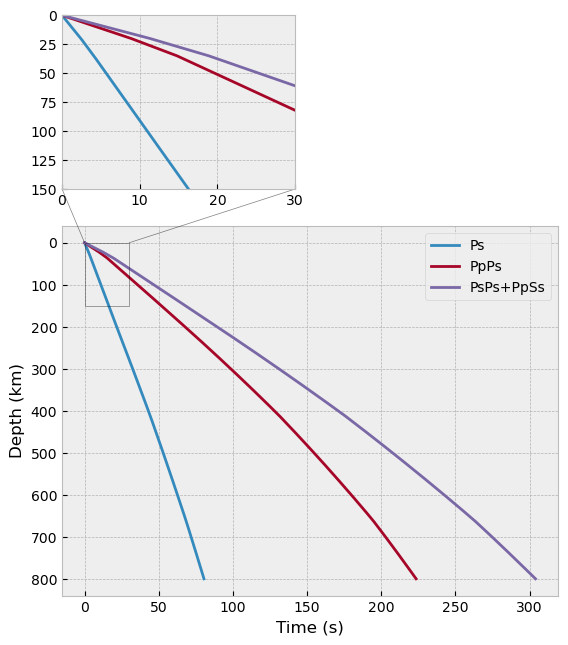

In [4]:
from seispy.geo import skm2srad
rayp = skm2srad(0.06)
t1 = depmod_ak135.tpds(rayp, rayp) # Ps
tm1 = depmod_ak135.tpppds(rayp, rayp) # PpPs
tm2 = depmod_ak135.tpspds(rayp, rayp) # PsPs+PpSs

plt.plot(t1, depmod_ak135.depths, label='Ps')
plt.plot(tm1, depmod_ak135.depths, label='PpPs')
plt.plot(tm2, depmod_ak135.depths, label='PsPs+PpSs')
plt.legend()
plt.gca().invert_yaxis()
plt.xlabel('Time (s)')
plt.ylabel('Depth (km)')

# inset axes....
axins = plt.gca().inset_axes([0, 1.1, 0.47, 0.47])
axins.plot(t1, depmod_ak135.depths, label='Ps')
axins.plot(tm1, depmod_ak135.depths, label='PpPs')
axins.plot(tm2, depmod_ak135.depths, label='PsPs+PpSs')
# sub region of the original image
x1, x2, y1, y2 = 0, 30, 0, 150
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.invert_yaxis()
plt.gca().indicate_inset_zoom(axins, edgecolor="black")


Following case show relationship between time difference and depth with ray-parameter from 0.04 to 0.08 s/km.

Text(0, 0.5, 'Depth (km)')

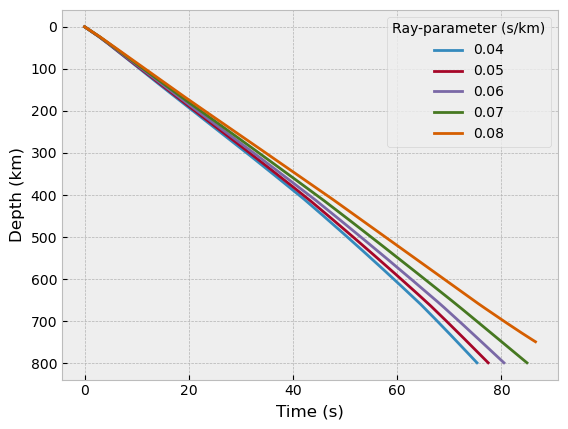

In [5]:
rayp_list = np.arange(0.04, 0.09, 0.01)
tps = np.zeros([rayp_list.size, depmod_ak135.depths.size])
for i, raypps in enumerate(rayp_list):
    tps[i] = depmod_ak135.tpds(skm2srad(raypps), skm2srad(raypps)) 
    plt.plot(tps[i], depmod_ak135.depths, label='{:.2f}'.format(raypps))
plt.legend(title='Ray-parameter (s/km)')
plt.gca().invert_yaxis()
plt.xlabel('Time (s)')
plt.ylabel('Depth (km)')

